In [214]:
import sys  
sys.path.insert(0, '/Stats-Toolbox')

from statsbox import Decision_Tree
from statsbox import K_Means
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

# Benchmark KMEANS CLUSTERING

### Read in a dataset for clustering

In [215]:
df = pd.read_csv("../wine-clustering.csv")

In [216]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### use plot_elbow( ) to find a good value of k to use 

Generate a numpy array from the dataset

In [217]:
X = df.iloc[:, 0:].values

Now we will use the K_Means.plot_elbow() function to find out what our best K to use for this data set is.
As we can see below, we get an elbow point at k=4

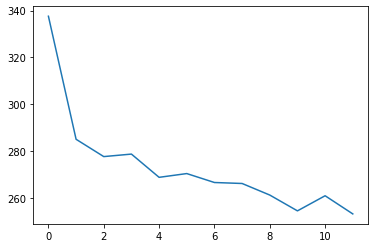

In [218]:
K_Means.plot_elbow(X, 12)

##  Benchmarking for dataset 1

###### call K.means.cluster to get clustered dataset, use sklearn.cluster.Kmeans to also get a clustered dataset, compare the two by
######                       1. visualize clusterings using our visualization function
######                       2. compare the cluster centroids returned by the clusterings
######                       3. check percentage of points classified differently across the two

### 1. Visualize clusterings in 2-D using K_Means.plot_clusters()

##### cluster using k = 2

###### a. statsbox Kmeans clustering

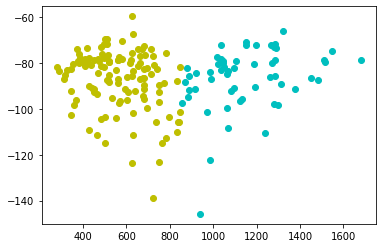

In [219]:
cluster, centroids = K_Means.cluster(2, X)
K_Means.plot_clusters(cluster, X)

###### b. sklearn Kmeans clustering

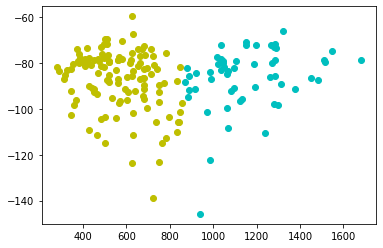

In [220]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

##### cluster using k = 4

###### a. statsbox Kmeans clustering

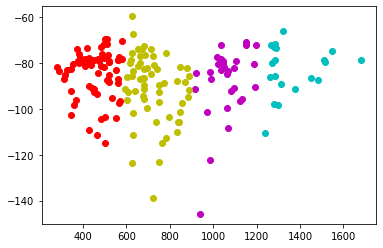

In [221]:
cluster, centroids = K_Means.cluster(4, X)
K_Means.plot_clusters(cluster, X)

###### b. sklearn Kmeans clustering

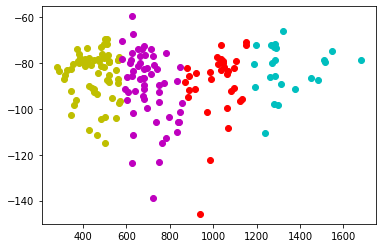

In [222]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

### 2. Compare the cluster centres

In [223]:
our_centroids = sorted(centroids, key=lambda x: x[0])
sklearn_centroids=[]
for c in kmeans.cluster_centers_:
    sklearn_centroids.append(c)
sklearn_centroids = sorted(sklearn_centroids, key=lambda x: x[0])

#### We can see below that centroids returned by statsbox kmeans are very close to the centroids returned by sklearn

In [224]:
for x in range(len(our_centroids)):
    a = []
    b = []
    print("for centroid c"+str(x))
    for i in range(len(our_centroids[0])):
        o = our_centroids[x][i]
        s = sklearn_centroids[x][i]
        a.append(round(o,2))
        b.append(round(s,2))
        
    print("our     centroid   " + str(a))
    print("sklearn centroid   " + str(b))    
        
    

for centroid c0
our     centroid   [12.51, 2.49, 2.28, 20.78, 92.22, 2.07, 1.78, 0.39, 1.46, 4.07, 0.94, 2.5, 456.29]
sklearn centroid   [12.5, 2.44, 2.28, 20.78, 92.47, 2.07, 1.8, 0.38, 1.47, 4.07, 0.95, 2.5, 452.55]
for centroid c1
our     centroid   [12.91, 2.55, 2.41, 19.97, 102.58, 2.08, 1.51, 0.39, 1.45, 5.72, 0.87, 2.32, 716.25]
sklearn centroid   [12.93, 2.66, 2.4, 19.98, 101.84, 2.05, 1.46, 0.4, 1.43, 5.75, 0.87, 2.3, 697.09]
for centroid c2
our     centroid   [13.67, 1.95, 2.38, 17.17, 106.5, 2.82, 2.94, 0.28, 1.95, 5.13, 1.06, 3.19, 1057.57]
sklearn centroid   [13.53, 1.93, 2.37, 17.73, 106.5, 2.72, 2.74, 0.29, 1.88, 4.99, 1.04, 3.09, 1017.44]
for centroid c3
our     centroid   [13.92, 1.77, 2.5, 17.2, 106.65, 2.91, 3.08, 0.3, 1.91, 6.32, 1.12, 3.01, 1360.85]
sklearn centroid   [13.86, 1.79, 2.51, 17.07, 106.0, 2.94, 3.11, 0.3, 1.93, 6.26, 1.1, 3.04, 1338.57]


### 3. Compare the clusterings returned 

###### cluster ids of statsbox clustering

In [225]:
cluster 

array([2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 0, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3])

###### cluster ids of sklearn clustering

In [227]:
pred_clusters

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

###### change the cluster id indexes to match the order of the sklearn cluster ids (might need to be changed when run based on above two cells ^)

In [228]:
cluster_ours=[]
for c in cluster:
    c1=0
    if c==3:
        c1=0
    elif c==2:
        c1=3
    elif c==0:
        c1=2
    elif c==1:
        c1=1
        
    cluster_ours.append(c1)


#### compare the differences in clustering

In [229]:
cluster_ours - pred_clusters

array([ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,
        0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

#### compute the percentage similarity between clusterings

In [230]:
arr=cluster_ours - pred_clusters
c_z=0
for c in arr:
    if c==0:
        c_z+=1
print(c_z/len(arr))

0.9438202247191011


## Benchmarking for Dataset 2

In [233]:
df = pd.read_csv("Credit Card Customer Data.csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


##### use plot_elbow( ) to find a good value of k to use  

In [234]:
X = df.iloc[:, 1:].values

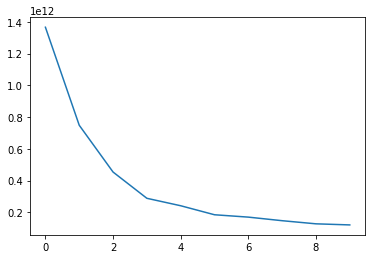

In [235]:
K_Means.plot_elbow(X, 10)

### 1. Visualize clusterings in 2-D using K_Means.plot_clusters()

##### cluster using k = 2

###### a. statsbox Kmeans clustering

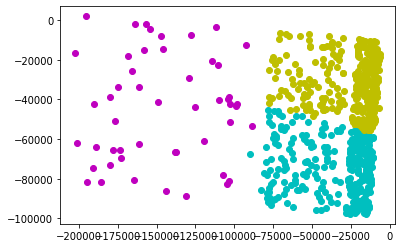

In [236]:
cluster, centroids = K_Means.cluster(3, X, 0)
K_Means.plot_clusters(cluster, X)

###### a. sklearn Kmeans clustering

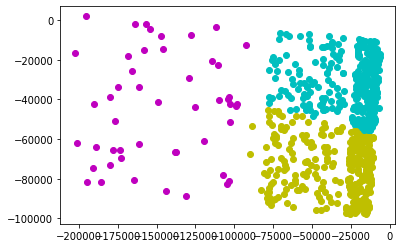

In [237]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

### 2. Compare the cluster centres

In [238]:
pred_clusters = kmeans.predict(X)

In [239]:
our_centroids = sorted(centroids, key=lambda x: x[0])
sklearn_centroids=[]
for c in kmeans.cluster_centers_:
    sklearn_centroids.append(c)
sklearn_centroids = sorted(sklearn_centroids, key=lambda x: x[0])

for x in range(len(our_centroids)):
    a = []
    b = []
    print("for centroid c"+str(x))
    for i in range(len(our_centroids[0])):
        o = our_centroids[x][i]
        s = sklearn_centroids[x][i]
        a.append(round(o,2))
        b.append(round(s,2))
        
    print("our     centroid   " + str(a))
    print("sklearn centroid   " + str(b))    

for centroid c0
our     centroid   [34029.89, 23097.79, 4.41, 2.53, 2.0, 3.79]
sklearn centroid   [34029.89, 23097.79, 4.41, 2.53, 2.0, 3.79]
for centroid c1
our     centroid   [56950.04, 141360.0, 8.6, 0.6, 10.62, 1.08]
sklearn centroid   [56872.86, 142530.61, 8.57, 0.59, 10.57, 1.06]
for centroid c2
our     centroid   [77673.64, 28767.92, 4.36, 2.57, 1.9, 3.78]
sklearn centroid   [77616.02, 28955.78, 4.38, 2.57, 1.94, 3.78]


### 3. Compare the clusterings returned 

In [240]:
cluster 

array([2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [241]:
pred_clusters

array([2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

change the below code based on the above cells

In [242]:
cluster_ours=[]
pred_cluster=[]
for c in cluster:
    if c==0:
        c1=1
    elif c==1:
        c1=0
    elif c==2:
        c1=2
    cluster_ours.append(c1)
for b in pred_clusters:
    pred_cluster.append(b)

In [243]:
cluster_ours - pred_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### compute the percentage similarity between clusterings

In [244]:
arr=cluster_ours - pred_clusters
c_z=0
for c in arr:
    if c==0:
        c_z+=1
print(c_z/len(arr))

0.9984848484848485


# Benchmarking Decision Tree

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from statsbox import Decision_Tree
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("../drug200.csv")
col_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
data = df
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=41)

classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=3, max_depth=3)
# classifier.fit(X_train,Y_train)

classifier.fit(X_train, Y_train, 'entropy')

Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))


0.925


In [22]:
df = pd.read_csv("../train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df=df.dropna()

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [25]:

Y = df['Survived'].values.reshape(-1, 1)

df = df.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'PassengerId', 'Survived', 'Sex'], axis=1)


In [26]:
X = df.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=41)

In [27]:
classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=1, max_depth=5)

In [28]:
classifier.fit(X_train, Y_train, 'entropy')

Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.7567567567567568


In [29]:
X_train

array([[  1.    ,  51.    ,   1.    ,   0.    ,  77.9583],
       [  1.    ,  56.    ,   0.    ,   0.    ,  35.5   ],
       [  1.    ,  41.    ,   0.    ,   0.    , 134.5   ],
       [  1.    ,  35.    ,   1.    ,   0.    ,  90.    ],
       [  1.    ,  32.    ,   0.    ,   0.    ,  76.2917],
       [  1.    ,  39.    ,   0.    ,   0.    ,   0.    ],
       [  1.    ,  36.    ,   0.    ,   0.    ,  40.125 ],
       [  1.    ,  24.    ,   3.    ,   2.    , 263.    ],
       [  1.    ,  29.    ,   0.    ,   0.    ,  30.    ],
       [  1.    ,  40.    ,   0.    ,   0.    , 153.4625],
       [  2.    ,  32.5   ,   0.    ,   0.    ,  13.    ],
       [  1.    ,  18.    ,   0.    ,   2.    ,  79.65  ],
       [  3.    ,  42.    ,   0.    ,   0.    ,   7.65  ],
       [  1.    ,  54.    ,   1.    ,   0.    ,  78.2667],
       [  1.    ,  35.    ,   1.    ,   0.    ,  83.475 ],
       [  1.    ,  48.    ,   1.    ,   0.    ,  52.    ],
       [  1.    ,  54.    ,   0.    ,   0.    ,  51.8625

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.5945945945945946


In [31]:
from statsbox import TF_tools as tfidf
import pandas as pd
df = pd.read_csv("../Amazon-data.csv")
sentences = df['reviews.text']
x_sent = []
for s in sentences:
    x_sent.append(s)
x_sent = x_sent[500:1000]
x = x_sent[20:50]

x = (tfidf.remove_stopwords(tfidf.lowercase(tfidf.remove_punctuation(x))))
words_set = tfidf.get_word_set(x, 'set')

df_tf = tfidf.TF_matrix(x, words_set, 'list')
df_tf_idf = tfidf.TF_IDF(x, words_set, df_tf, 'list')

df_tf_idf = pd.DataFrame(df_tf_idf)
print(df_tf_idf)


         0         1         2         3         4         5         6    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.028916  0.000000  0.000000  0.000000  0.000000  0.028916   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.016255  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.050223  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

/var/folders/vl/5bp0nbzd28vgxygxw50kjt4r0000gn/T/ipykernel_85936/3628652456.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Amazon-data.csv")


In [32]:
import numpy as np
import pandas as pd
from statsbox.logistic_regression import LogisticRegression

# Logistic Regression Code Reference: https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
# Data source: https://www.kaggle.com/code/dyasin/week24ml-weather-dataset-rattle-package-weatheraus/data 

def handle_nulls(df):
    for col in df:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)

df = pd.read_csv("weatherAUS.csv")
y = pd.get_dummies(df.RainTomorrow, drop_first=True)
y = y.values.reshape(-1,1)

# Drop categorical columns
df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'Evaporation', 'Sunshine', 'WindDir3pm', 'RainToday',  "RainTomorrow"],  axis=1, inplace=True)
handle_nulls(df)

# Normalize Data
df = (df-df.mean())/df.std()
X = df.values

# # Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=44)

logregmodel = LogisticRegression()

logregmodel.fit(X_train,y_train,lr=0.01, epochs=1000, batchsize=10000)
y_pred = logregmodel.predict(X_test)

print("Accuracy: ",logregmodel.accuracy(y_test,y_pred))

Accuracy:  0.8596177643338375


In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/abhik-mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
clf.score(X_test, y_test)

0.8425684036848619